In [10]:
%matplotlib inline

import numpy as np
from pylab import *
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

sns.set()
pd.set_option('display.max_colwidth', 0)

In [11]:
# internet connection required to access file
df = pd.read_csv("https://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv")

In [12]:
# replacing all NaN values with 0s
df = df.fillna(0)

In [14]:
###################################################################################################################
###################################################################################################################

# function to culculate totals of vote, undecided and other percentages.
def Total(Column, candidate):
    Total = []
    for perc in range (len(candidate)):
        percentage_decimal = (candidate[perc] / 100)
        participants = Column[perc]
        Total.append(participants * percentage_decimal) 
    return sum(Total)

###################################################################################################################
#calling the total function
Obama_B = Total(df['Number of Observations'], df['Obama'])
Other_V = Total(df['Number of Observations'], df['Other'])
Romney_M = Total(df['Number of Observations'], df['Romney'])
Undecided_V = Total(df['Number of Observations'], df['Undecided'])

###################################################################################################################

# Added totals of vote, undecided and other percentages.
Total_Votes = Obama_B + Romney_M + Undecided_V + Other_V

###################################################################################################################

# Added totals of vote, undecided and other percentages as percentages.
Total_Votes_percentage = 100
Obama_percentage = (Obama_B / Total_Votes) * 100
Romney_percentage = (Romney_M / Total_Votes) * 100
Undecided_percentage = (Undecided_V / Total_Votes) * 100
Other_percentage = (Other_V / Total_Votes) * 100

###################################################################################################################
###################################################################################################################

# End date vote poll Totals dataframe creation
Votes_df                           = pd.DataFrame(pd.Series(), columns = ['End Date'])
Votes_df['Number of Observations'] = 0
Votes_df['Obama']                  = 0
Votes_df['Romney']                 = 0
Votes_df['Undecided']              = 0
Votes_df['Other']                  = 0

# variables for additional culculations of the above dataframe
length        = len(df['End Date']) - 1
NoO_tot       = 0.0
Obama_tot     = 0.0
Other_tot     = 0.0
Romney_tot    = 0.0
Undecided_tot = 0.0

#for loop to populate votes totals of end date period
for count in range (length):
    
    
    if df['End Date'][count] != df['End Date'][length]:
                                                      
        if df.iloc[count][2] == df.iloc[count + 1][2]: 
            End_Date          = df.iloc[count][2]
                
            NoO               = df.iloc[count][4]
            NoO_tot          += NoO
            
            Obama             = df.iloc[count][4] * df.iloc[count][7] / 100
            Obama_tot        += Obama
            
            Romney            = df.iloc[count][4] * df.iloc[count][8] / 100
            Romney_tot       += Romney
            
            Undecided         = df.iloc[count][4] * df.iloc[count][9] / 100
            Undecided_tot    += Undecided
            
            Other             = df.iloc[count][4] * df.iloc[count][10] / 100
            Other_tot        += Other
        
        else:
            End_Date          = df.iloc[count][2]
            NoO               = df.iloc[count][4]
            NoO_tot          += NoO
            
            Obama             = df.iloc[count][4] * df.iloc[count][7] / 100
            Obama_tot        += Obama

            Romney            = df.iloc[count][4] * df.iloc[count][8] / 100
            Romney_tot       += Romney

            Undecided         = df.iloc[count][4] * df.iloc[count][9] / 100
            Undecided_tot    += Undecided

            Other             = df.iloc[count][4] * df.iloc[count][10] / 100
            Other_tot        += Other

            Vot_tot = [End_Date, NoO_tot, Obama_tot, Romney_tot, Undecided_tot, Other_tot]
            Votes_df.loc[(f'{count}')] = Vot_tot  
            NoO_tot       = 0
            Obama_tot     = 0
            Romney_tot    = 0
            Undecided_tot = 0
            Other_tot     = 0
    else:
        pass

###################################################################################################################
###################################################################################################################

# Dataframe of vote percentage on end date of polls
V_perc_df                           = pd.DataFrame(pd.Series(), columns = ['End Date'])
V_perc_df['Number of Observations'] = 0
V_perc_df['Obama']                  = 0
V_perc_df['Romney']                 = 0
V_perc_df['Undecided']              = 0
V_perc_df['Other']                  = 0

###################################################################################################################
# variables for additional culculations of the above dataframe
length        = len(df['End Date']) - 1
NoO_tot       = 0.0
Obama_tot     = 0.0
Other_tot     = 0.0
Romney_tot    = 0.0
Undecided_tot = 0.0

###################################################################################################################
#for loop to populate Dataframe of vote percentage on end date of polls
for count in range (length):
    
    
    if df['End Date'][count] != df['End Date'][length]:
                                                      
        if df.iloc[count][2] == df.iloc[count + 1][2]: 
            End_Date          = df.iloc[count][2]
                
            NoO               = df.iloc[count][4]
            NoO_tot           = NoO
            
            Obama             = df.iloc[count][7]
            Obama_tot         = Obama
            
            Romney            = df.iloc[count][8]
            Romney_tot        = Romney
            
            Undecided         = df.iloc[count][9]
            Undecided_tot     = Undecided
            
            Other             = df.iloc[count][10]
            Other_tot         = Other
        
        else:
            End_Date          = df.iloc[count][2]
            
            NoO               = df.iloc[count][4]
            NoO_tot           = NoO
            
            Obama             = df.iloc[count][7]
            Obama_tot         = Obama

            Romney            = df.iloc[count][8]
            Romney_tot        = Romney

            Undecided         = df.iloc[count][9]
            Undecided_tot     = Undecided

            Other             = df.iloc[count][10]
            Other_tot         = Other

            Vot_tot = [End_Date, NoO_tot, Obama_tot, Romney_tot, Undecided_tot, Other_tot]
            V_perc_df.loc[(f'{count}')] = Vot_tot  
            NoO_tot       = 0
            Obama_tot     = 0
            Romney_tot    = 0
            Undecided_tot = 0
            Other_tot     = 0
    else:
        pass
    
###################################################################################################################
###################################################################################################################
# dataframe of the vote percentage total
Votes = pd.DataFrame(pd.Series(Total_Votes_percentage), columns = ['Total_Votes'])
Votes['Obama %'] = Obama_percentage
Votes['Romney %'] = Romney_percentage
Votes['Undecided %'] = Undecided_percentage
Votes['Other %'] = Other_percentage

###################################################################################################################
###################################################################################################################

<ipython-input-14-6ec5ec506fcc>:38: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  Votes_df                           = pd.DataFrame(pd.Series(), columns = ['End Date'])
<ipython-input-14-6ec5ec506fcc>:108: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  V_perc_df                           = pd.DataFrame(pd.Series(), columns = ['End Date'])


In [15]:
###################################################################################################################

print('''1. Who was being polled and what was their party affiliations?

Obama was a US Democratic Party Affiliate while Romney was a US Republican Party Affiliate.\n''')

###################################################################################################################

1. Who was being polled and what was their party affiliations?

Obama was a US Democratic Party Affiliate while Romney was a US Republican Party Affiliate.



2. Did the poll results favor Romney or Obama?

The Polls were in favor of Obama.



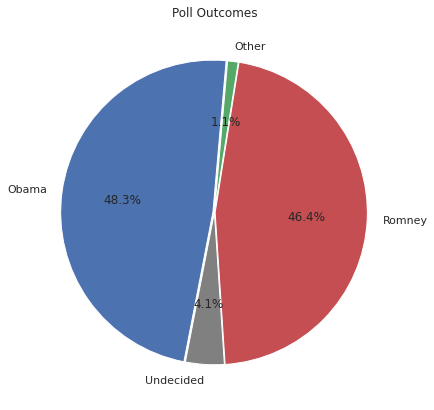

In [16]:
###################################################################################################################

print('''2. Did the poll results favor Romney or Obama?

The Polls were in favor of Obama.\n''')

###################################################################################################################

Candidates = Obama_B, Undecided_V, Romney_M, Other_V
colors = 'b', 'grey', 'r', 'g'
explode = [0.01,0,0.005,0]
labels = ['Obama', 'Undecided', 'Romney', 'Other']

fig = plt.figure(figsize=(10,7))
plt.pie(Candidates, colors = colors, labels = labels, explode = explode, startangle = 85, autopct = '%.1f%%')
plt.title('Poll Outcomes')
plt.show()


In [17]:
###################################################################################################################

print('''3. How do undecided voters effect the poll?

The Undecided Voters accounted for an average of 4.1% of the Polls, 
there might have changed the outcome of the polls in favor of either party.\n''')
###################################################################################################################

Votes

3. How do undecided voters effect the poll?

The Undecided Voters accounted for an average of 4.1% of the Polls, 
there might have changed the outcome of the polls in favor of either party.



,Total_Votes,Obama %,Romney %,Undecided %,Other %
0,100,48.339199,46.44753,4.095086,1.118186


4. Can we account for the undecided voters?

We can account for the undecided voters using a scatter plot.



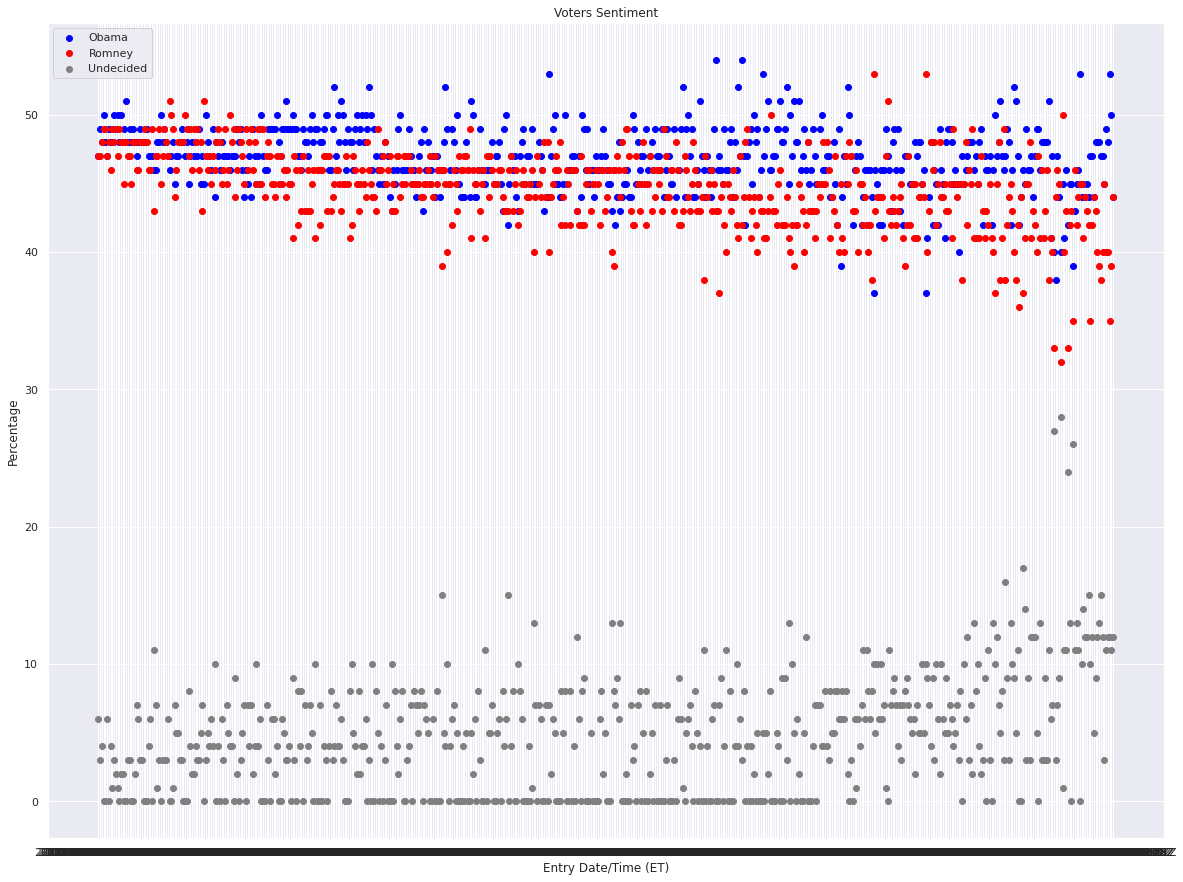

In [18]:
###################################################################################################################

print('''4. Can we account for the undecided voters?

We can account for the undecided voters using a scatter plot.\n''')

###################################################################################################################
Votes
fig = plt.figure(figsize=(20,15))
plt.scatter(x = df['Entry Date/Time (ET)'], y = df['Obama'], c = 'blue',  label = "Obama")
plt.scatter(x = df['Entry Date/Time (ET)'], y = df['Romney'], c = 'red',  label = "Romney")
plt.scatter(x = df['Entry Date/Time (ET)'], y = df['Undecided'], c = 'grey',  label = "Undecided")
plt.title('Voters Sentiment')
plt.xlabel('Entry Date/Time (ET)')
plt.ylabel('Percentage')
plt.legend()
plt.show()

5. How did the voter sentiment change over time?

At the start of the election, both candidates had an almost even support base. 
However overtime the voters sentiment turned in favor of Obama.



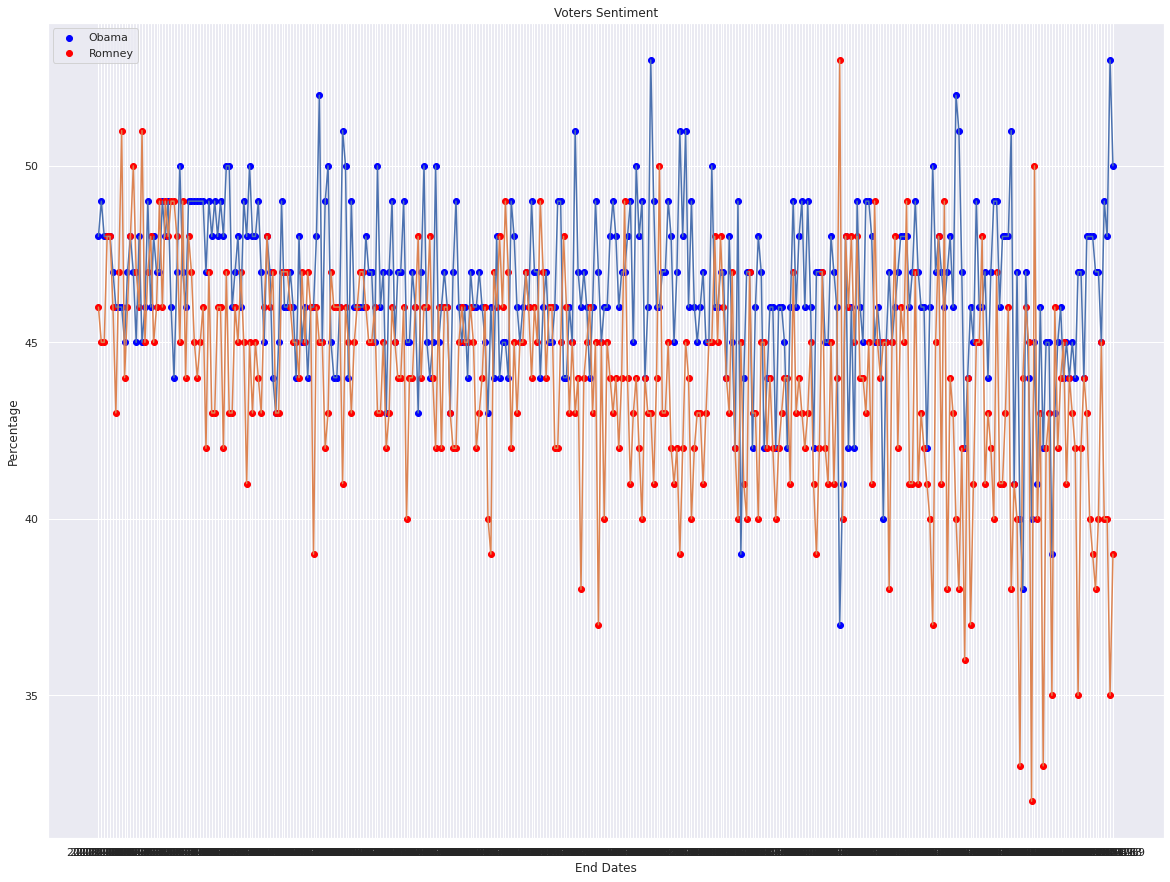

In [20]:
###################################################################################################################

print('''5. How did the voter sentiment change over time?

At the start of the election, both candidates had an almost even support base. 
However overtime the voters sentiment turned in favor of Obama.\n''')

###################################################################################################################
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot()
ax.plot(V_perc_df['End Date'], V_perc_df['Obama'])
ax.plot(V_perc_df['End Date'], V_perc_df['Romney'])

plt.scatter(x = V_perc_df['End Date'], y = V_perc_df['Obama'], c = 'blue',  label = "Obama")
plt.scatter(x = V_perc_df['End Date'], y = V_perc_df['Romney'], c = 'red',  label = "Romney")
plt.title('Voters Sentiment')
plt.xlabel('End Dates')
plt.ylabel('Percentage')
plt.legend()
plt.show()

6. Can we see an effect in the polls from the debates?

We can see the effects of the debates from the polls,
this is because we can see changes in voters sentiment on each date of the debates.



<ipython-input-22-425b2e2a5aac>:19: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  Debate_df              = pd.DataFrame(pd.Series(), columns = ['End Date'])


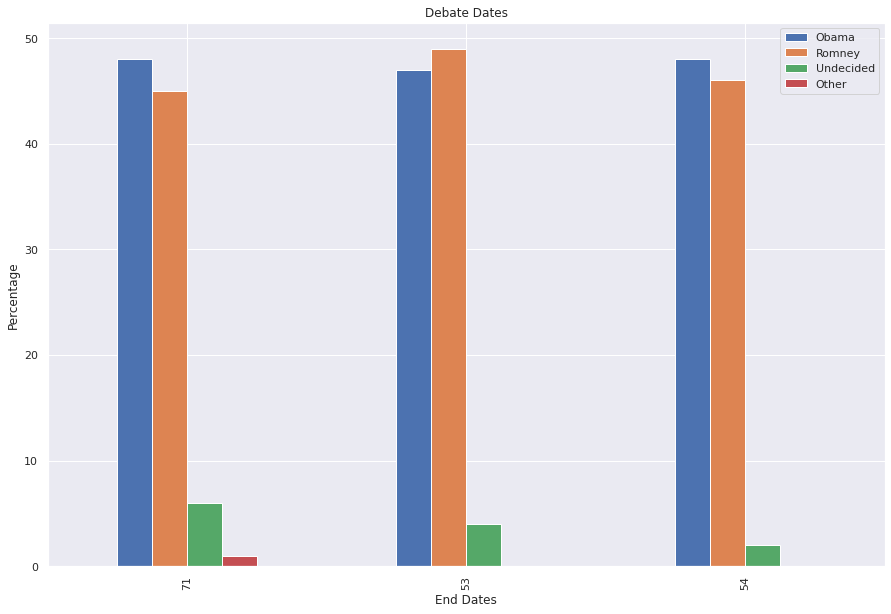

In [22]:
###################################################################################################################

print('''6. Can we see an effect in the polls from the debates?

We can see the effects of the debates from the polls,
this is because we can see changes in voters sentiment on each date of the debates.\n''')
###################################################################################################################

debate_dates           = ['2012-10-3', '2012-10-16', '2012-10-22']
Debate_Indexes         = []

for date in debate_dates:
    for count in range (len(V_perc_df)):
        
        if date == df['End Date'][count]:
            Debate_Indexes.append(count)
        pass
    
Debate_df              = pd.DataFrame(pd.Series(), columns = ['End Date'])
Debate_df['Obama']     = 0
Debate_df['Romney']    = 0
Debate_df['Undecided'] = 0
Debate_df['Other']     = 0

for index in Debate_Indexes: 
    Debate = (df['End Date'][index], df['Obama'][index], df['Romney'][index],
              df['Undecided'][index], df['Other'][index])
    Debate_df.loc[(f'{index}')] = Debate

ax = Debate_df.sort_values(['End Date']).plot(kind = 'bar', figsize = (15, 10))
plt.title('Debate Dates')
plt.xlabel('End Dates')
plt.ylabel('Percentage')
plt.legend()
plt.show()